In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('NLP.tsv',delimiter='\t',quoting=3)
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [2]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91871\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
print(corpus[:6])

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho']


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
x=cv.fit_transform(corpus).toarray()
y=df.iloc[:,-1].values
len(x[0])

1500

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x) 

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
x=pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[5.82423329e-03 5.49559205e-03 5.13065194e-03 4.77286168e-03
 4.61532217e-03 4.54186997e-03 4.42627074e-03 4.33846019e-03
 4.29667327e-03 4.15890326e-03 4.15001378e-03 4.10616432e-03
 3.99519361e-03 3.94051614e-03 3.89503878e-03 3.87653216e-03
 3.87083689e-03 3.77772749e-03 3.74061243e-03 3.73376740e-03
 3.70602614e-03 3.68309395e-03 3.67451862e-03 3.64363237e-03
 3.61765081e-03 3.60094820e-03 3.58149514e-03 3.54540566e-03
 3.52860077e-03 3.49990398e-03 3.48241331e-03 3.44163003e-03
 3.43431435e-03 3.39870540e-03 3.37133686e-03 3.34185840e-03
 3.31714303e-03 3.29301410e-03 3.28451321e-03 3.27566407e-03
 3.25288172e-03 3.24416276e-03 3.24049695e-03 3.21327868e-03
 3.19260028e-03 3.17832114e-03 3.16396282e-03 3.13760164e-03
 3.11618527e-03 3.10320224e-03 3.09452682e-03 3.09050387e-03
 3.07050617e-03 3.06740515e-03 3.04575076e-03 3.03672530e-03
 3.03097620e-03 3.01555822e-03 3.00161636e-03 2.98373322e-03
 2.97631147e-03 2.95312058e-03 2.93660437e-03 2.92705102e-03
 2.90085173e-03 2.889837

In [7]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.02,random_state=50)

In [8]:
from sklearn.svm import SVC
classifier=SVC(kernel='poly',degree=1,random_state=40)
classifier.fit(x_tr,y_tr)

SVC(degree=1, kernel='poly', random_state=40)

In [9]:
y_pr=classifier.predict(x_te)
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
print(accuracy_score(y_te,y_pr))
print(confusion_matrix(y_te,y_pr))

0.95
[[10  1]
 [ 0  9]]


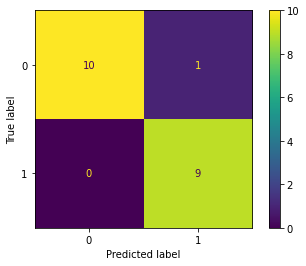

In [10]:
plot_confusion_matrix(estimator=classifier,X=x_te,y_true=y_te)